In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read the data
data = None
with open('log.txt') as f:
    data = f.read().splitlines()
    
filtered_data = []
for line in data:
    if 'compass_calibration' in line:
        words = line.split()
        values = [words[3], words[4], words[5]]
        for i in range(3):
            values[i] = values[i].strip(',')
        filtered_data.append(values)
        
print(filtered_data)

NameError: name 'filtered_data' is not defined

In [ ]:
data = np.array(filtered_data, dtype=int)

In [ ]:
max_x = np.max(data[:,0])
min_x = np.min(data[:,0])
max_y = np.max(data[:,1])
min_y = np.min(data[:,1])

# Center points
center_x = (max_x + min_x) / 2
center_y = (max_y + min_y) / 2

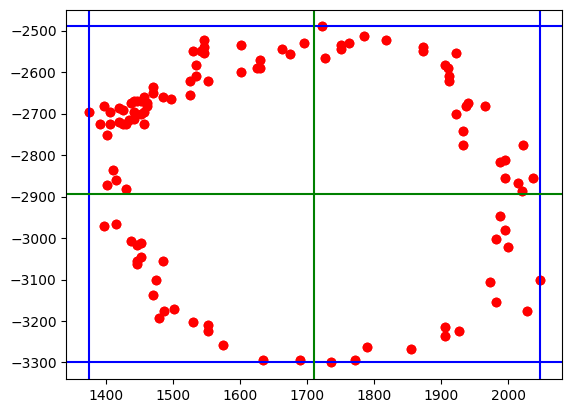

In [ ]:
# Plot the data
plt.scatter(data[:,0], data[:,1] , c='r')

plt.axline((min_x, min_y), (max_x, min_y), color='b')
plt.axline((max_x, min_y), (max_x, max_y), color='b')
plt.axline((max_x, max_y), (min_x, max_y), color='b')
plt.axline((min_x, max_y), (min_x, min_y), color='b')

plt.axline((center_x, center_y), (center_x + 100, center_y), color='g')
plt.axline((center_x, center_y), (center_x, center_y + 100), color='g')

plt.show()

In [ ]:
# Calculate the offset vector
translate = [-center_x, -center_y, 0]
print(translate)

[-1711.0, 2895.0, 0]


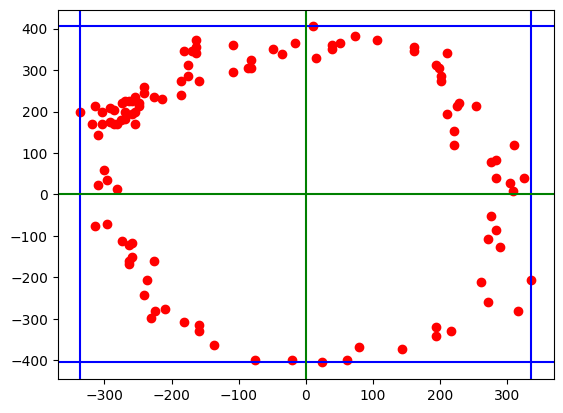

In [ ]:
translated_data = data + translate

max_x = np.max(translated_data[:,0])
min_x = np.min(translated_data[:,0])
max_y = np.max(translated_data[:,1])
min_y = np.min(translated_data[:,1])

# Center points
center_x = (max_x + min_x) / 2
center_y = (max_y + min_y) / 2
# Plot the translated_data
plt.scatter(translated_data[:,0], translated_data[:,1] , c='r')

plt.axline((min_x, min_y), (max_x, min_y), color='b')
plt.axline((max_x, min_y), (max_x, max_y), color='b')
plt.axline((max_x, max_y), (min_x, max_y), color='b')
plt.axline((min_x, max_y), (min_x, min_y), color='b')

plt.axline((center_x, center_y), (center_x + 100, center_y), color='g')
plt.axline((center_x, center_y), (center_x, center_y + 100), color='g')

plt.show()

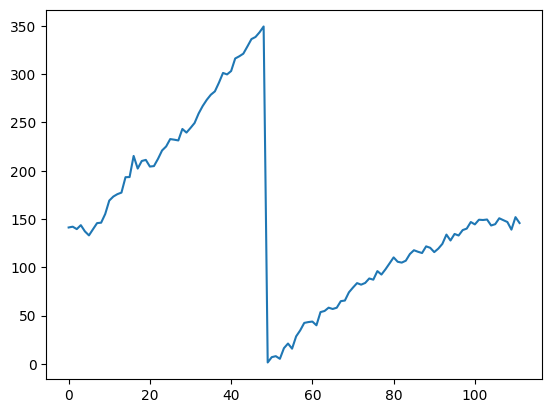

In [ ]:
# Calculate degrees
def calculate_degrees(x, y):
    degrees = np.arctan2(y, x) * 180 / np.pi
    return degrees if degrees >= 0 else 360 + degrees

v_degrees = np.vectorize(calculate_degrees)
degrees = v_degrees(translated_data[:,0], translated_data[:,1])

# Plot
plt.plot(degrees)
plt.show()

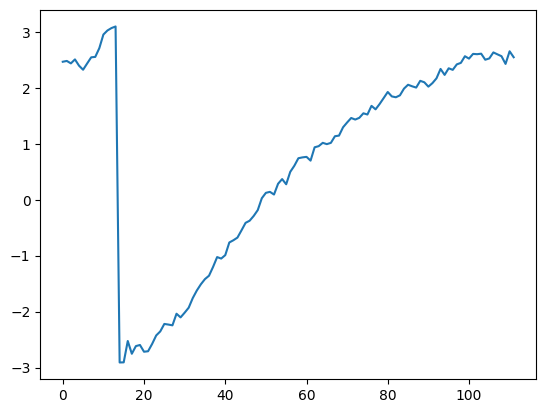

In [ ]:
# Calculate radians
radians = np.arctan2(translated_data[:,1], translated_data[:,0])

plt.plot(radians)
plt.show()